Replikacija genoma pocinje u delu DNK koji nazivamo **pocetni region replikacije** (skraceno **oriC** - Origin of RepliCation). Prokarioti (bakterije izmedju ostalog) tipicno imaju samo jedan DNK molekul kruznog oblika i samo jedan oriC region. Za razliku od prokariota, eukariotski DNK molekuli su linearni i mnogo veći (duzi) od prokariotskih, i imaju vise oriC regiona sto znaci da se replikacija moze zapoceti istovremeno na vise lokacija duz svakog DNK molekula (eukariotski genom se obicno sastoji od veceg broja DNK molekula, tj. hromozoma).

Ogranicicemo razmatranje samo na replikaciju DNK kod bakterija. Replikacija bakterijske DNK, dakle, pocinje od uvek istog regiona - **oriC regiona**. Unutar oriC regiona nalaze se kratke DNK sekvence (duzine od oko 9 nukleotida) koje predstavljaju mesta za koje se vezuje protein **DnaA** i inicira proces replikacije. Te kratke sekvence, mesta vezivanja DnaA proteina nazivaju se **DnaA boksovi**. Evolucija je obezbedila visestruka ponavljanja DnaA boksova unutar oriC regiona, kako bi se sa vecom verovatnocom obezbedilo vezivanje DnaA proteina i otpocela replikacija. To je potrebno, jer ako DnaA protein promasi mesto vezivanja, celija odumire.

<img src="assets/dna_replication.png" width="700">

Replikacija pocinje rasplitanjem polinukleotidnih lanaca DNK molekula u oriC regionu, sto vrsi <u>DnaA protein</u>. Dalje razdvajanje lanaca DNK vrsi enzim <u>DNK helikaza</u>. Vezivanje odgovarajucih komplementarnih nukleotida (koji se vec nalaze u celiji, "plivaju" po citoplazmi) za otvorene lance DNK i njihovo medjusobno povezivanje fosfodiestarskim vezama u nove (komplementarne) lance vrsi enzim <u>DNK polimeraza</u>. Kako su lanci DNK *anitparalelni*<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1), proces sinteze novih lanaca DNK se vrsi u suprotnim smerovima. Ono sto je karakteristicno za DNK plimerazu je to da sintezu novih lanaca DNK moze da vrsi iskljucivo u smeru $5' \rightarrow 3'$, sto rezultuje time da se jedan novi lanac sintetise kontinuirano dok se drugi lanac sintetise iz delova (tzv. <u>Okazaki fragmenti</u>). Lanac koji se sintetise kontinuirano naziva se <u>vodeci lanac</u> a lanac koji se sintetise iz delova <u>zaostajuci lanac</u>. Enzim <u>DNK ligaza</u> vrsi spajanje Okazaki fragmenata na zaostajucem lancu.

<a name="cite_note-1"></a>[<sup>[1]</sup>](#cite_ref-1) Vazna osobina polinukleotidnih lanaca je njihova usmerenost. Na jednom kraju lanca nalazi se C5' fosfatna grupa i taj kraj se naziva <u>5' kraj</u>, dok se na drugom kraju nalazi C3' hidroksilna grupa i to je <u>3' kraj</u>. Antiparalelnost lanaca kod DNK molekula podrazumeva to da se naspram 5' kraja jednog lanca nalazi se 3' kraj drugog.

# Problem pronalazenja DnaA boksova unutar oriC regiona

Za pocetak, pretpostavimo da nam je poznat oriC region. Problem pronalazenja DnaA boksova svodimo na problem pronalazenja visestruko ponovljenih kratkih sekvenci unutar teksta.

## Naivni algoritam

Naivni pristup pronalazenja visetruko ponovljenih sekvenci duzine k (k-grami) unutar teksta zasniva se na izdvajanju svih podniski duzine k (k-grama) i prebrojavanju (pretrazi) koliko puta se svaka od njih nalazi unutar datog teksta.

**Vremenska slozenost:** `k x |Text| x (|Text|-k) = O(k x |Text|^2)`   <br/>
**Prostorna slozenost:** `|Text|-k+1 = O(|Text|)`

Funkcija **pattern_count** prebrojava pojavljivanja niske **pattern** u okviru niske **text**.

In [1]:
def pattern_count(text, pattern):
    n = len(text)
    k = len(pattern)
    count = 0
    
    for i in range(0, n-k+1):
        current_pattern = text[i:i+k]
        if current_pattern == pattern:
            count += 1
        
    return count

In [5]:
def prebroj_patern(text, pattern):
    n = len(text)
    k = len(pattern)
    br = 0

    for i in range(0, n - k + 1):
        curr_pattern = text[i:i+k] # k-grami
        if curr_pattern == pattern:
            br += 1
    print(br)
    return br

In [2]:
text = 'ATATGCTAGTGCTAGATGTGCTA'
pattern = 'TGCT'

print(pattern_count(text, pattern))

3


In [6]:
prebroj_patern(text, pattern)

3


3

Funkcija **frequent_words** pronalazi najzastupljenije podsekvence duzine **k** u okviru niske **text**.

In [ ]:
# najzastupljenije podsekvence duzine k u okviru niske text

def frekfenca_reci(text, k):
    n = len(text)

     brojaci = [1 for i in range(0, n-k+1)]

     for i in range(0, n - k + 1):
         patern = text[i : i+k]
         brojaci[i] = prebroj_patern(text, patern)

     max_count = max(brojaci)


In [7]:
def frequent_words(text, k):
    n = len(text)
    
    #niz koji ce sluziti za brojanje pojavljivanja svakog k-grama
    #indeksi su indeksi pocetka k-grama u niski text, a vrednosti su brojevi pojavljivanja k-grama
    counts = [1 for i in range(0, n-k+1)]
    
    for i in range(0, n-k+1):
        pattern = text[i:i+k]
        counts[i] = pattern_count(text, pattern)
    
    max_count = max(counts)
    
    #skup koji ce cuvati sve najzastupljenije k-grame, bez duplikata
    most_frequent_patterns = set([])
    
    for i in range(0, n-k+1):
        if counts[i] == max_count:
            most_frequent_patterns.add(text[i:i+k])
            
    return list(most_frequent_patterns)    

In [8]:
text = 'ATATGCTAGTGCTAGATGTGCTA'
k = 4

print(frequent_words(text, k))

['GCTA', 'TGCT']


In [9]:
oriC = 'ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCA'
k = 9

print(frequent_words(oriC, k))

['GCATGATCA', 'AAGCATGAT', 'TCTTGATCA', 'CTCTTGATC', 'AGCATGATC', 'ATGATCAAG']


## Napredniji algoritam

Osnovna ideja naprednijeg algoritma je to da se u samo jednom prolazu kroz nisku text izvrsi prebrojavanje svih k-grama. Na taj nacin se positze smanjenje vremenske slozenosti, ali na ustrb povecanja prostorne slozenosti.

Kako se niska koja predstavlja DNK sastoji samo od 4 karaktera, tada je broj razlicitih k-grama jednak $4^k$. Tada mozemo napraviti preslikavanje k-grama u brojeve na sledeci nacin: <br/>

**'A' $\rightarrow$ 0**   <br/>
**'T' $\rightarrow$ 1**   <br/>
**'C' $\rightarrow$ 2**   <br/>
**'G' $\rightarrow$ 3**   <br/>

Tada svaki k-gram mozemo da predstavimo jednim k-tocifrenim brojem u brojcanom sistemu sa osnovom 4 (cifre {0, 1, 2, 3}), pri cemu je najmanji broj $\mathbf{0 = 00...0}$, a najveci broj $\mathbf{4^k-1 = 33...3}$. Na ovaj nacin smo zapravo napravili preslikavanje svih k-grama u brojeve iz intervala $\mathbf{[0, 4^k-1]}$.

Ideja algoritma je da napravimo niz brojaca za svaki od mogucih k-grama, niz duzine $4^k$ (ciji su indeksi iz opsega \[0, $4^k$-1\]), i da u jednom prolasku kroz nisku text izdvajamo jedan po jedan k-gram, preslikamo ga u broj opisanim preslikavanjem, i uvecamo njemu odgovarajuci brojac (na odgovarajucem indeksu niza brojaca).

**Vremenska slozenost:** `O(|Text|)`    <br/>
**Prostorna slozenost:** `O(4^k)`    

Kako su, u konkretnom problemu pronalazenja pocetka replikacije, DnaA boksovi kratke sekvence (do 10-ak nukleotida) sledi da je k mali broj, pa nam je ova eksponencijalna prostorna slozenost prihvatljiva. 

Funkcija **symbol_to_number** vrsi preslikavanje simbola nukleotida u odgovarajuce numericke vrednost - cifre iz brojevnog sistema sa osnovom 4.

In [12]:
def symbol_to_number(symbol):
    mapping = {
        'A' : 0,
        'T' : 1,
        'C' : 2,
        'G' : 3
    }
    
    return mapping[symbol]

In [13]:
print(symbol_to_number('C'))

2


Funkcija **pattern_to_number** vrsi preslikavanje nukleotidne sekvence **pattern** u odgovarajuci numericku vrednost. Prevodjenje se vrsi rekurzivno, primenom Hornerove sheme. Algoritam je ekvivalentan algoritmu za prevodjenje zapisa iz sistema sa osnovom 4 u dekadni zapis. <br/>
`pattern_to_number('ATCG') = pattern_to_number('ATC') * 4 + symbol_to_number('G')}`

In [14]:
def pattern_to_number(pattern):
    if(len(pattern) == 1):
        return symbol_to_number(pattern)
    else:
        last_symbol = pattern[-1]
        return pattern_to_number(pattern[:-1])*4 + symbol_to_number(last_symbol)    

In [15]:
pattern = 'ATCG'
print(pattern_to_number(pattern))

27


Potrebno je da imamo i funkciju koja vrsi inverzno preslikavanje - preslikavanje numerickih vrednosti iz opsega $[0, 4^k-1]$ u nisku duzine k. Potrebno je da primetimo da se svakoj numerickoj vrednosti moze pridruzivi vise razlicitih k-grama:

A = 0     $\hspace{1.5cm}$      TT = 5     <br/>
AA = 0    $\hspace{1.3cm}$      ATT = 5  <br/>
AAA = 0   $\hspace{1cm}$        AATT = 5  <br/>
...       $\hspace{2.1cm}$      ...

Medjutim, ako nam je poznat broj k (duzina sekvence koju treba da pridruzimo datoj numerickoj vrednosti), onda je preslikavanje jednoznacno odredjeno. Potrebno je samo odrediti sekvencu minimalne duzine koja odgovara datoj numerickoj vrednosti i dopuniti je odgovarajucim brojem vodecih 'A'-ova (neutral) do duzine k.

Funkcija **number_to_symbol** za datu cifru iz sistema sa osnovom 4 vraca odgovarajuci simbol nukleotida.

In [16]:
def number_to_symbol(number):
    mapping = {
        0 : 'A',
        1 : 'T',
        2 : 'C',
        3 : 'G'
    }
    
    return mapping[number]

In [17]:
number = 2
print(number_to_symbol(number))

C


Funkcija **number_to_pattern** prevodi datu numericku vrednost (**number**) u nukleotidnu sekvencu duzine **k**. Prevodjenje se vrsi rekurzivno, primenom Hornerove sheme. Algoritam je ekvivalentan algoritmu za prevodjenje dekadnog zapisa u zapis u sistemu sa osnovom 4.<br/>
`number_to_pattern(27, 4) = number_to_pattern(27 // 4, 3) + number_to_symbol(27 % 4)`

In [18]:
def number_to_pattern(number, k):
    if k==1:
        return number_to_symbol(number)
    else:
        prefix = number//4
        remainder = number%4
        return number_to_pattern(prefix, k-1) + number_to_symbol(remainder)

In [19]:
number = 27
k = 6
print(number_to_pattern(number, k))

AAATCG


Funkcija **computing_frequencies** formira niz brojaca za svaki od mogucih k-grama. Svakom k-gramu odgovara onaj brojac koji ima indeks sa vrednoscu koja odgovara numerickoj vrednosti tog k-grama datim preslikavanjem.

In [20]:
def computing_frequencies(text, k):
    frequency_array = [0 for x in range(4**k)]
    
    n = len(text)
    
    for i in range(0, n-k+1):
        pattern = text[i:i+k]
        number = pattern_to_number(pattern)
        frequency_array[number] += 1
        
    return frequency_array

Funkcija **faster_frequent_words** pronalazi najzastupljenije podsekvence duzine **k** u okviru niske **text**.

In [21]:
def faster_frequent_words(text, k):
    #ovde ne mora da bude skup zato sto prilikom ubacivanja prolazimo kroz skup svih razlicitih k-grama
    most_frequent_patterns = set([])           
    
    frequency_array = computing_frequencies(text, k)
    
    max_count = max(frequency_array)
    
    for number in range(0, 4**k):
        if frequency_array[number] == max_count:
            most_frequent_patterns.add(number_to_pattern(number, k))
            
    return list(most_frequent_patterns)

In [22]:
oriC = 'ATCAATGATCAACGTAAGCTTCTAAGCATGATCAAGGTGCTCACACAGTTTATCCACAACCTGAGTGGATGACATCAAGATAGGTCGTTGTATCTCCTTCCTCTCGTACTCTCATGACCACGGAAAGATGATCAAGAGAGGATGATTTCTTGGCCATATCGCAATGAATACTTGTGACTTGTGCTTCCAATTGACATCTTCAGCGCCATATTGCGCTGGCCAAGGTGACGGAGCGGGATTACGAAAGCATGATCATGGCTGTTGTTCTGTTTATCTTGTTTTGACTGAGACTTGTTAGGATAGACGGTTTTTCATCACTGACTAGCCAAAGCCTTACTCTGCCTGACATCGACCGTAAATTGATAATGAATTTACATGCTTCCGCGACGATTTACCTCTTGATCATCGATCCGATTGAAGATCTTCAATTGTTAATTCTCTTGCCTCGACTCATAGCCATGATGAGCTCTTGATCA'
k = 9

print(faster_frequent_words(oriC, k))

['GCATGATCA', 'AAGCATGAT', 'TCTTGATCA', 'CTCTTGATC', 'AGCATGATC', 'ATGATCAAG']


**NAPOMENA:** Vremenska slozenost prethodnog algoritma je zapravo `max{|Text|, 4^k}` zbog petlje koja ide od 0 do $4^k$, sto znaci da je vremenska slozenost `O(|Text|)` samo ukoliko je `4^k << |Text|`, sto u vecini realnih situacija i jeste slucaj.

Postoji algoritam koji ima zagarantovanu vremensku slozenost `O(|Text|)` koriscenjem sufiksnog stabla.

# Problem pronalazenja DnaA boksova sa izvesnim brojem mutacija unutar oriC regiona

DnaA boks moze da se pojavljuje i sa izvesnim mutacijama, takvim da se i za dalje za njega moze vezati DnaA protein. Iz tog razloga, problem pronalazenja DnaA boksova svodimo na problem pronalazenja visestruko ponovljenih kratkih sekvenci unutar teksta, <u>uz dozvoljeno odstupanje</u>.

**Hamingovo rastojanje** definise se kao broj pozicija na kojima se dve niske razlikuju. Podrazumevamo da su duzine stringova jednake kada racunamo Hamingovo rastojanje. Hamingovo rastojanje se ne koristi za niske razlicitih duzine, vec neke druge metrike.

In [17]:
def hamming_distance(string1, string2):
    n = len(string1)       
    
    distance = 0
    for i in range(n):
        if string1[i] != string2[i]:
            distance += 1
            
    return distance                 

In [18]:
string1 = 'AAAA'
string2 = 'ACAT'
print(hamming_distance(string1, string2))

2


Funkcija **immediate_neighbors** generise listu niski koje su na Hamingovom rastojanju 1 od zadate niske **pattern**.

In [19]:
def immediate_neighbors(pattern):
    neighborhood = {pattern}
    
    for i in range(len(pattern)):
        for nucleotide in ['A', 'C', 'G', 'T']:
            
            #ovaj uslov cak nije ni neophodan posto ubacujemo u skup, tako da ce biti eliminisani duplikati
            if nucleotide != pattern[i]:          
                neighbor = pattern[:i] + nucleotide + pattern[i+1:]
                neighborhood.add(neighbor)
                
    return list(neighborhood)

In [20]:
pattern = 'AAA'
print(immediate_neighbors(pattern))

['AAC', 'GAA', 'AAT', 'AGA', 'CAA', 'AAA', 'TAA', 'ACA', 'ATA', 'AAG']


Funkcija **neighbors** je iterativna implementacija funkcije koja generise listu niski koje su na najvise **d** Hamingovom rastojanju od zadate niske **pattern**.

In [21]:
def neighbors(pattern, d):
    neighborhood = {pattern} 
    
    for i in range(d):
        new_neighbors = []      #NAPOMENA: Python ne dozvoljava da se menja sadrzaj kolekcije tokom iteriranja 
                                #kroz istu, zbog toga imamo ovu pomocnu kolekciju koju koristimo u naredne dve 
                                #petlje zajedno sa glavnom kolekcijom (neighborhood) na taj nacin da se kroz jednu 
                                #kolekciju iterira dok se u drugu dodaju novi elementi!
        
        for current_pattern in neighborhood:
            new_neighbors += immediate_neighbors(current_pattern)
            
        for neighbor in new_neighbors:
            neighborhood.add(neighbor)
            
    return list(neighborhood)

In [22]:
pattern = 'AAA'
d = 1
print(neighbors(pattern, d))

['AAC', 'GAA', 'AAT', 'AGA', 'AAA', 'CAA', 'TAA', 'ACA', 'ATA', 'AAG']


Funkcija **approximate_pattern_count** prebrojava pojavljivanja podniski u niski **text** koje su na **d** Hamingovom rastojanju od zadatke niske **pattern**.

In [23]:
def approximate_pattern_count(text, pattern, d):
    n = len(text)
    k = len(pattern)
    
    count = 0
   
    for i in range(n-k+1):
        if hamming_distance(pattern, text[i:i+k]) <= d:
            count += 1
            
    return count

Funckija **frequent_words_with_missmatches** pronalazi listu svih najzastupljenijih podniski duzine **k** u zadatoj niski **text**, dopustajuci pri poredjenju niski najvise **d** razlika. Drugim recima, funckija pronalazi najzastupljenije podsekvence oriC-a duzine k sa najvise d dozvoljenih mutacija.

In [24]:
def frequent_words_with_missmatches(text, k, d):
    #ova lista nam samo sluzi da u njoj zabelezimo indikatore 0 ili 1 u zavisnosti od toga da li se k-gram sa
    #vrednoscu koja odgovara datom indeksu nalazi na d Hamingovom rastojanju od nekog k-grama u okviru niske text
    #ili ne, tj. samo da zabelezimo koji su to kandidati za DNA boksove
    candidats_indicator = [0 for i in range(4**k)]
    
    frequency_array = [0 for i in range(4**k)]
    
    n = len(text)
    
    for i in range(0, n-k+1):
        neighborhood = neighbors(text[i:i+k], d)
        
        for pattern in neighborhood:
            number = pattern_to_number(pattern)
            candidats_indicator[number] = 1
            
    for number in range(0, 4**k):
        if(candidats_indicator[number] == 1):
            pattern = number_to_pattern(number, k)
            frequency_array[number] = approximate_pattern_count(text, pattern, d)
                
    max_count = max(frequency_array)
        
    most_frequent_patterns = set([])    
    for number in range(0, 4**k):
        if frequency_array[number] == max_count:
            pattern = number_to_pattern(number, k)
            most_frequent_patterns.add(pattern)
        
    return list(most_frequent_patterns)

In [25]:
text = 'ATATGCTAGTGTCGATGTGCTA'
k = 4
d = 2

print(frequent_words_with_missmatches(text, k, d))

['GGTT', 'GTTG', 'TTGG']


**NAPOMENA**: Postavlja se pitanje zasto ne racunamo **approximate_pattern_count** samo za one k-grame koji su podsekvence niske text, vec i za sve njihove d-susede (na najvise d Hamingovom rastojanju). To je zato sto se k-gram koji ima najvise pojavljivanja do na d razlika mozda ne pojavljuje u neizmenjenom obliku (bez mutacija) niti jednom u niski text!

<u>PRIMER</u>: `text = 'ATGCAAC'` <br/>
               $\hspace{1.6cm}$svi 3-grami koji se pojaviljuju u niski text imaju tacno po 1 pojavljivanje uzimajuci u obzir i sve njihove 1-susede, medjutim 3-gram 'ATC' koji se <br/>
               $\hspace{1.6cm}$nijednom ne pojavljuje u niski tekst ima 2 pojavljivanja svojih 1-suseda ('ATG' i 'AAC'), sto bi znacilo da je 'ATC' najbolji kandidat za DnaA box

# G-C Skew dijagram

Sada kada znamo kako da pronadjemo DnaA boksove kada nam je oriC poznat, potrebno je jos da pronadjemo oriC region u okviru DNK. Pokazuje se da se prilikom replikacije DNK desava to da pre nego sto DNK polimeraza dodje na scenu i pocne da vezuje nukleotide iz citoplazme celije za "otvoreni" lanac, ti lanci stoje otvoreni neko vreme dok se replikaciona viljuska ne uveca dovoljno. To znaci da je region pocetka replikacije onaj region lanca koji najduze ostaje "otvoren" prilikom replikacije, i koji je samim tim najpodlozniji mutacijama (**"otvoreni" lanci su znacajno vise podlozni mutacijama nego kada su DNK lanci povezani**).

Interesuje nas koji to nukleotidi imaju najvecu stopu mutacija, jer ce nam njegov manjak u delovima DNK ukazati da se bas na tom mestu zapocinje replikacija, tj. da je tu oriC. **Ispostavlja se da C najcesce mutira u T (deaminacija - nestanak amino grupe), sto znaci da cemo u regionu oriC-a na lancu koji predstavlja sablon zaostajuceg lanca (region koji ostaje najduze otvoren) imati manje C-a u odnosu na kolicinu G-a.** Zbog komplementarnosti DNK lanaca, to znaci da ce na lancu koji predstavlja sablon vodeceg lanca (glavni, osnovni lanac) imati manje G-a u odnosu na kolicinu C-a. **Kako kada radimo sa DNK uobicajeno posmatramo glavni lanac, to znaci da cemo oriC traziti kao region na kome razlika G-C dostize svoj minimum.**

In [26]:
def calculate_GC_Skew(dna_sequence):
    last = 0
    skew = [0 for c in dna_sequence]
    
    for i in range(len(dna_sequence)):
        if dna_sequence[i] == 'G':
            skew[i] = last + 1
            last += 1
            
        elif dna_sequence[i] == 'C':
            skew[i] = last - 1
            last -= 1
            
        else:
            skew[i] = last
            
    return skew

In [27]:
import matplotlib.pyplot as plt

In [28]:
def draw_GC_Skew(dna_sequence):
    x = [i for i in range(len(dna_sequence))]
    y = calculate_GC_Skew(dna_sequence)
    
    plt.plot(x, y)
    plt.show()

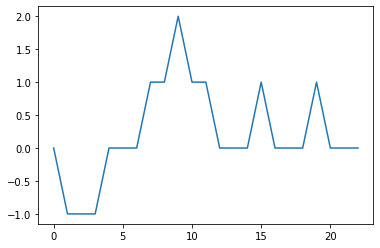

In [29]:
dna_sequence = 'ACTAGTAGTGCACTAGCTAGCTA'

draw_GC_Skew(dna_sequence)

In [30]:
ulaz = open('ecoli.txt')
dna_sequence = ulaz.read()

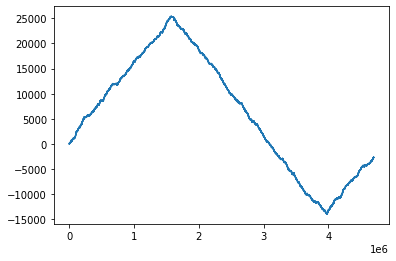

In [31]:
draw_GC_Skew(dna_sequence)